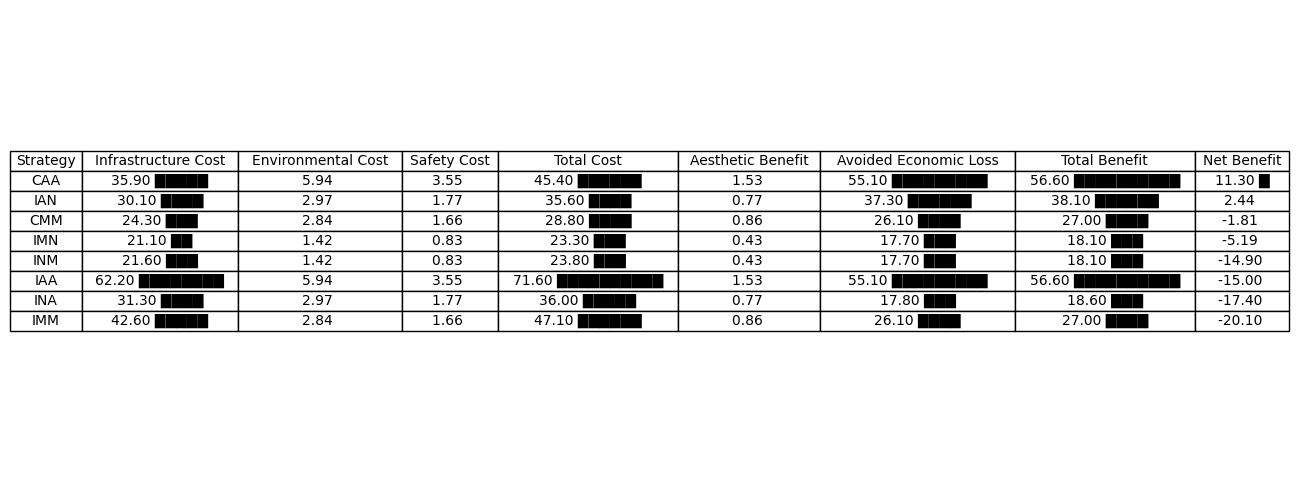

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame replicating Table 3
data = {
    'Strategy': ['CAA', 'IAN', 'CMM', 'IMN', 'INM', 'IAA', 'INA', 'IMM'],
    'Infrastructure Cost': [35.9, 30.1, 24.3, 21.1, 21.6, 62.2, 31.3, 42.6],
    'Environmental Cost': [5.94, 2.97, 2.84, 1.42, 1.42, 5.94, 2.97, 2.84],
    'Safety Cost': [3.55, 1.77, 1.66, 0.83, 0.83, 3.55, 1.77, 1.66],
    'Total Cost': [45.4, 35.6, 28.8, 23.3, 23.8, 71.6, 36.0, 47.1],
    'Aesthetic Benefit': [1.53, 0.77, 0.86, 0.43, 0.43, 1.53, 0.77, 0.86],
    'Avoided Economic Loss': [55.1, 37.3, 26.1, 17.7, 17.7, 55.1, 17.8, 26.1],
    'Total Benefit': [56.6, 38.1, 27.0, 18.1, 18.1, 56.6, 18.6, 27.0],
    'Net Benefit': [11.3, 2.44, -1.81, -5.19, -14.9, -15.0, -17.4, -20.1]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Function to add bars in the cells
def draw_bars(value, max_value, color):
    """Draw horizontal bar representing the value in table cells."""
    bar_length = value / max_value * 100  # normalize value to percentage
    return f'{value:.2f} ' + '█' * int(bar_length / 10)  # draw bars scaled to length

# Create a new DataFrame for the table with bars
max_cost = df[['Infrastructure Cost', 'Environmental Cost', 'Safety Cost', 'Total Cost']].max().max()
max_benefit = df[['Aesthetic Benefit', 'Avoided Economic Loss', 'Total Benefit', 'Net Benefit']].max().max()

df_bar = df.copy()

# Replace numerical values with bars for visual representation
for col in ['Infrastructure Cost', 'Environmental Cost', 'Safety Cost', 'Total Cost']:
    df_bar[col] = df[col].apply(lambda x: draw_bars(x, max_cost, 'blue'))

for col in ['Aesthetic Benefit', 'Avoided Economic Loss', 'Total Benefit', 'Net Benefit']:
    df_bar[col] = df[col].apply(lambda x: draw_bars(x, max_benefit, 'green'))

# Now, plot the DataFrame as a table with matplotlib
fig, ax = plt.subplots(figsize=(12, 6))  # Set figure size
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=df_bar.values, colLabels=df_bar.columns, cellLoc='center', loc='center')

# Adjust the font size and style for better readability
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Set column widths
for i, key in enumerate(df_bar.columns):
    table.auto_set_column_width([i])

# Show plot with table
plt.show()
